In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 


image 1/1 /content/for_inference.png: 640x544 1 potted plant, 216.7ms
Speed: 4.0ms preprocess, 216.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 544)


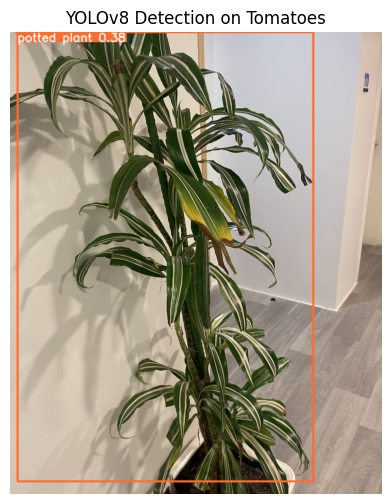

In [4]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd
import shutil
import ast


model = YOLO("yolov8n.pt")


img_path = "/content/for_inference.png"
image = cv2.imread(img_path)


results = model(img_path)

annotated = results[0].plot()


plt.figure(figsize=(8,6))
plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("YOLOv8 Detection on Tomatoes")
plt.show()

In [3]:


# Download latest version
path = kagglehub.dataset_download("alexo98/leaf-detection")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/leaf-detection


In [4]:
"""
The dataset used in this project comes from a CSV file that contains:
- Image filenames (image_id)
- Image dimensions (width, height)
- Bounding box coordinates for each leaf in the format [x, y, width, height]

The steps we performed are:
1. Created directories to store images and YOLO-format labels.
2. Copied all image files into the images/train directory.
3. Converted bounding box coordinates from [x, y, w, h] format to YOLO format:
   - x_center = (x + w / 2) / image_width
   - y_center = (y + h / 2) / image_height
   - width  = w / image_width
   - height = h / image_height
4. For each image, we created a corresponding .txt file containing the YOLO-format annotations.
   - The class ID is set to 0 since there is only one class (leaf).
5. Finally, we generated a data.yaml file to define the dataset paths and class names,
   which is required for training YOLOv8.
"""


base_path = "/content/leaf-detection"
images_dir = os.path.join(base_path, "images/train")
labels_dir = os.path.join(base_path, "labels/train")
os.makedirs(images_dir, exist_ok=True)
os.makedirs(labels_dir, exist_ok=True)


shutil.copy("/kaggle/input/leaf-detection/train.csv", f"{base_path}/train.csv")


for filename in os.listdir("/kaggle/input/leaf-detection/train"):
    if filename.endswith(".jpg"):
        shutil.copy(
            f"/kaggle/input/leaf-detection/train/{filename}",
            f"{images_dir}/{filename}"
        )


df = pd.read_csv(f"{base_path}/train.csv")
for _, row in df.iterrows():
    image_id = row["image_id"]
    img_width = row["width"]
    img_height = row["height"]
    bbox = ast.literal_eval(row["bbox"])

    x, y, w, h = bbox
    x_center = (x + w / 2) / img_width
    y_center = (y + h / 2) / img_height
    w /= img_width
    h /= img_height

    label_path = os.path.join(labels_dir, image_id.replace('.jpg', '.txt'))
    with open(label_path, "a") as f:
        f.write(f"0 {x_center:.6f} {y_center:.6f} {w:.6f} {h:.6f}\n")


data_yaml = f"""
path: {base_path}
train: images/train
val: images/train

names:
  0: leaf
"""

with open(os.path.join(base_path, "data.yaml"), "w") as f:
    f.write(data_yaml)



In [5]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(
    data="/content/leaf-detection/data.yaml",epochs=100, imgsz=640
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 73.0MB/s]


Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/leaf-detection/data.yaml, epochs=100, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_wi

100%|██████████| 755k/755k [00:00<00:00, 12.6MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 22        [15, 18, 21]  1    751507  ultralytics.nn.modules.head.Detect           [1, [64, 128, 256]]           
Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 956.0±410.9 MB/s, size: 27.6 KB)


train: Scanning /content/leaf-detection/labels/train... 1130 images, 2 backgrounds, 0 corrupt: 100%|██████████| 1132/1132 [00:00<00:00, 1827.75it/s]

train: New cache created: /content/leaf-detection/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 834.1±302.6 MB/s, size: 27.7 KB)


val: Scanning /content/leaf-detection/labels/train.cache... 1130 images, 2 backgrounds, 0 corrupt: 100%|██████████| 1132/1132 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      1.385      2.006      1.489         71        640: 100%|██████████| 71/71 [15:03<00:00, 12.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  17%|█▋        | 6/36 [01:29<07:27, 14.91s/it]


KeyboardInterrupt: 


image 1/1 /content/TEST_007.jpg: 640x640 24 leafs, 7.3ms
Speed: 4.3ms preprocess, 7.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


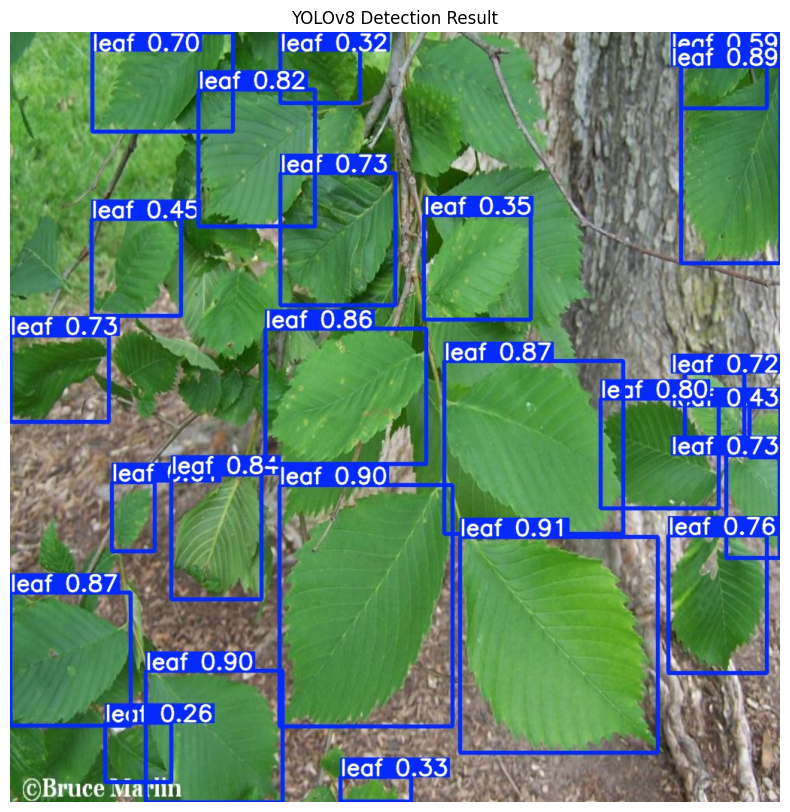

In [ ]:


model = YOLO("/content/runs/detect/train/weights/best.pt")


test_image_path = "/content/TEST_007.jpg"


results = model.predict(source=test_image_path, save=True, conf=0.25)


output_dir = results[0].save_dir
output_path = os.path.join(output_dir, os.path.basename(test_image_path))


img = cv2.imread(output_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis("off")
plt.title("YOLOv8 Detection Result")
plt.show()

In [ ]:
import os

for file in os.listdir("/content/runs/detect/predict3"):
    print(repr(file))

'Screenshot 1446-11-02 at 12.48.26\u202fAM.jpg'


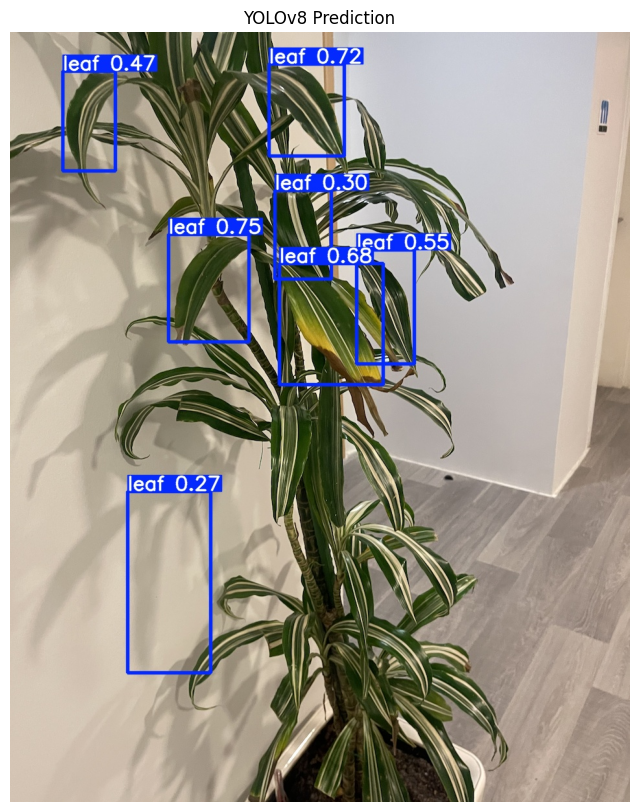

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("runs/detect/predict3/Screenshot 1446-11-02 at 12.48.26\u202fAM.jpg")

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis("off")
plt.title("YOLOv8 Prediction")
plt.show()

In [ ]:
#trining with agumntation

model.train(
    data="/content/leaf-detection/data.yaml",
    epochs=50,
    imgsz=640,
    degrees=15,
    scale=0.5,
    shear=5,
    fliplr=0.5,
    flipud=0.3
)

New https://pypi.org/project/ultralytics/8.3.121 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.120 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/train5/weights/best.pt, data=/content/leaf-detection/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, 

train: Scanning /content/leaf-detection/labels/train.cache... 1130 images, 2 backgrounds, 0 corrupt: 100%|██████████| 1132/1132 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.1 ms, read: 249.0±83.9 MB/s, size: 27.7 KB)


val: Scanning /content/leaf-detection/labels/train.cache... 1130 images, 2 backgrounds, 0 corrupt: 100%|██████████| 1132/1132 [00:00<?, ?it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train6
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      5.06G      2.461       2.43      2.376        154        640: 100%|██████████| 71/71 [00:21<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.47it/s]


                   all       1132       5346      0.403      0.328      0.278     0.0776

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.41G      1.776      1.661      1.832         73        640: 100%|██████████| 71/71 [00:21<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.35it/s]


                   all       1132       5346      0.598      0.496      0.534      0.242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.41G      1.629      1.559      1.747        115        640: 100%|██████████| 71/71 [00:19<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.34it/s]


                   all       1132       5346      0.537      0.565      0.532       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.41G      1.573       1.52      1.704         96        640: 100%|██████████| 71/71 [00:20<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.35it/s]


                   all       1132       5346       0.62      0.532      0.578      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.41G      1.553      1.484      1.687         92        640: 100%|██████████| 71/71 [00:19<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.39it/s]


                   all       1132       5346       0.63      0.595      0.637      0.369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.41G      1.526      1.448      1.661        115        640: 100%|██████████| 71/71 [00:20<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:09<00:00,  3.74it/s]


                   all       1132       5346      0.641      0.615      0.653      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.41G      1.519      1.418      1.661         64        640: 100%|██████████| 71/71 [00:19<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.37it/s]


                   all       1132       5346      0.652      0.633      0.671      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.41G      1.471      1.393      1.631         69        640: 100%|██████████| 71/71 [00:19<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.32it/s]

                   all       1132       5346      0.625      0.584      0.617      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.41G      1.465      1.359      1.626         72        640: 100%|██████████| 71/71 [00:21<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.40it/s]

                   all       1132       5346      0.664      0.607      0.659      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      6.41G      1.473      1.345       1.62         56        640: 100%|██████████| 71/71 [00:19<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.43it/s]


                   all       1132       5346      0.663      0.638      0.691      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.41G       1.45      1.308      1.596         64        640: 100%|██████████| 71/71 [00:20<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.60it/s]


                   all       1132       5346      0.663      0.655      0.697      0.402

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.41G      1.434       1.31      1.585         99        640: 100%|██████████| 71/71 [00:20<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.33it/s]

                   all       1132       5346      0.673      0.675      0.724      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.41G      1.431      1.311      1.582         89        640: 100%|██████████| 71/71 [00:19<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.34it/s]


                   all       1132       5346      0.676      0.666      0.718      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.41G      1.436      1.306      1.587         86        640: 100%|██████████| 71/71 [00:20<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.43it/s]


                   all       1132       5346      0.665      0.654      0.702      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.41G      1.414      1.276      1.574        105        640: 100%|██████████| 71/71 [00:19<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.38it/s]


                   all       1132       5346      0.673       0.67       0.72      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.41G      1.393      1.243       1.56        126        640: 100%|██████████| 71/71 [00:19<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:09<00:00,  3.62it/s]


                   all       1132       5346      0.673      0.653      0.709      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.41G      1.439      1.275      1.569        115        640: 100%|██████████| 71/71 [00:20<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.29it/s]


                   all       1132       5346      0.698      0.671      0.732      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      6.41G       1.38      1.237      1.557         55        640: 100%|██████████| 71/71 [00:19<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.37it/s]


                   all       1132       5346      0.687      0.672      0.731      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.41G      1.375      1.228       1.54        109        640: 100%|██████████| 71/71 [00:20<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.42it/s]


                   all       1132       5346      0.706      0.682      0.746      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.41G      1.388      1.232      1.545         93        640: 100%|██████████| 71/71 [00:19<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.47it/s]


                   all       1132       5346      0.699      0.689      0.749      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.41G      1.347       1.19      1.536        147        640: 100%|██████████| 71/71 [00:20<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.44it/s]


                   all       1132       5346      0.698      0.701       0.76      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.41G      1.359      1.215      1.539         91        640: 100%|██████████| 71/71 [00:20<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.43it/s]


                   all       1132       5346       0.69      0.697      0.742      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.41G      1.336      1.163      1.521         85        640: 100%|██████████| 71/71 [00:19<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.38it/s]


                   all       1132       5346      0.688      0.684      0.744      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.41G       1.33      1.189      1.523         80        640: 100%|██████████| 71/71 [00:20<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:09<00:00,  3.81it/s]


                   all       1132       5346      0.711      0.649      0.743       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.41G      1.339      1.167      1.508         74        640: 100%|██████████| 71/71 [00:20<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.53it/s]


                   all       1132       5346      0.715      0.714      0.776      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      6.41G      1.336      1.145      1.496         91        640: 100%|██████████| 71/71 [00:19<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.48it/s]


                   all       1132       5346      0.714      0.699      0.766      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.41G      1.329      1.156      1.514         83        640: 100%|██████████| 71/71 [00:20<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.34it/s]

                   all       1132       5346        0.7      0.723      0.771      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.41G      1.335      1.149       1.51         59        640: 100%|██████████| 71/71 [00:19<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.42it/s]


                   all       1132       5346       0.71      0.675      0.759      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.41G      1.311      1.148      1.503        107        640: 100%|██████████| 71/71 [00:20<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:09<00:00,  3.65it/s]


                   all       1132       5346      0.738      0.714      0.785      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.41G      1.306      1.124        1.5         78        640: 100%|██████████| 71/71 [00:20<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.39it/s]


                   all       1132       5346      0.726      0.703       0.78      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.41G      1.295      1.114      1.496         92        640: 100%|██████████| 71/71 [00:19<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.41it/s]


                   all       1132       5346      0.714       0.68      0.757      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.41G      1.294      1.125      1.489         56        640: 100%|██████████| 71/71 [00:20<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.41it/s]

                   all       1132       5346      0.735      0.719      0.789       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.41G      1.295      1.111      1.477         93        640: 100%|██████████| 71/71 [00:19<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.37it/s]


                   all       1132       5346      0.717      0.738      0.791      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.41G      1.301      1.099      1.478         75        640: 100%|██████████| 71/71 [00:19<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:09<00:00,  3.73it/s]


                   all       1132       5346      0.734       0.72      0.793        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.41G      1.302      1.114      1.489        110        640: 100%|██████████| 71/71 [00:20<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.39it/s]


                   all       1132       5346      0.738      0.709      0.793      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.41G      1.298      1.094      1.485         88        640: 100%|██████████| 71/71 [00:19<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.34it/s]


                   all       1132       5346      0.743      0.737      0.811      0.539

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.41G       1.28      1.088      1.471        140        640: 100%|██████████| 71/71 [00:20<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:09<00:00,  3.60it/s]


                   all       1132       5346      0.734      0.728        0.8      0.545

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.41G      1.282      1.075      1.477        137        640: 100%|██████████| 71/71 [00:19<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.45it/s]

                   all       1132       5346      0.735      0.738      0.804      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.41G      1.254      1.065      1.461         86        640: 100%|██████████| 71/71 [00:19<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.35it/s]


                   all       1132       5346      0.742      0.734      0.806      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.41G      1.262      1.074      1.469        139        640: 100%|██████████| 71/71 [00:20<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.37it/s]


                   all       1132       5346      0.757      0.727      0.811      0.529
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.41G       1.24     0.9771      1.469         36        640: 100%|██████████| 71/71 [00:20<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.45it/s]


                   all       1132       5346      0.746      0.732      0.804      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.41G      1.226     0.9567      1.451        106        640: 100%|██████████| 71/71 [00:21<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.44it/s]

                   all       1132       5346      0.749      0.728      0.804      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.41G      1.213     0.9603      1.442         83        640: 100%|██████████| 71/71 [00:18<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.48it/s]


                   all       1132       5346      0.768      0.727      0.812      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.41G      1.199     0.9454      1.445         53        640: 100%|██████████| 71/71 [00:18<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.43it/s]

                   all       1132       5346      0.727      0.741      0.804      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.41G      1.189     0.9278      1.431         55        640: 100%|██████████| 71/71 [00:19<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.56it/s]

                   all       1132       5346      0.764      0.742      0.823       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.41G      1.194     0.9107      1.421         41        640: 100%|██████████| 71/71 [00:18<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.45it/s]


                   all       1132       5346       0.78      0.733      0.823      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.41G       1.21     0.9239      1.442         96        640: 100%|██████████| 71/71 [00:18<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.43it/s]


                   all       1132       5346      0.766      0.742      0.824      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.41G      1.192      0.911      1.426         41        640: 100%|██████████| 71/71 [00:19<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:09<00:00,  3.68it/s]


                   all       1132       5346      0.772      0.746      0.827      0.573

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.41G      1.182     0.8923      1.405         25        640: 100%|██████████| 71/71 [00:18<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.43it/s]

                   all       1132       5346      0.779      0.743      0.829      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.41G      1.175     0.8867      1.415         33        640: 100%|██████████| 71/71 [00:18<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:10<00:00,  3.44it/s]

                   all       1132       5346      0.771      0.751      0.829      0.576



50 epochs completed in 0.431 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 6.2MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.120 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:12<00:00,  2.85it/s]


                   all       1132       5346       0.78      0.742      0.829      0.577
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train6


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c3344248890>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 


image 1/1 /content/for_inference.png: 640x544 6 leafs, 180.0ms
Speed: 3.8ms preprocess, 180.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)
Results saved to runs/detect/predict6


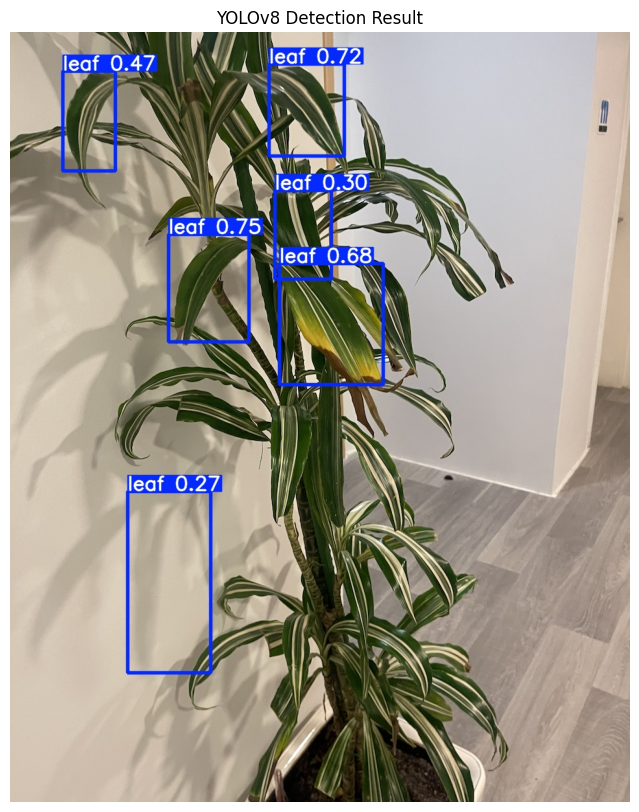

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

model = YOLO("/content/best.pt")
test_image_path = "/content/for_inference.png"

# Run prediction
results = model.predict(source=test_image_path, conf=0.25, iou=0.5, save=True)

# Get output path
output_dir = results[0].save_dir
output_path = os.path.join(output_dir, os.path.basename(test_image_path))

# Read and display image
img = cv2.imread(output_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis("off")
plt.title("YOLOv8 Detection Result")
plt.show()

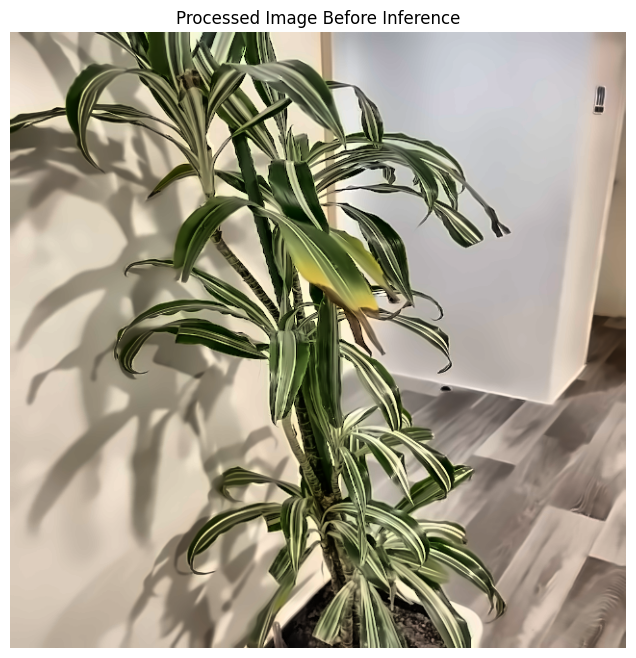

In [ ]:
# Load the original image
img_path = "/content/Screenshot 1446-11-02 at 12.48.26 AM.png"
img = cv2.imread(img_path)

# Resize the image to 640x640 for compatibility with the YOLO model
img_resized = cv2.resize(img, (640, 640))

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) to enhance contrast
img_yuv = cv2.cvtColor(img_resized, cv2.COLOR_BGR2YUV)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
img_yuv[:, :, 0] = clahe.apply(img_yuv[:, :, 0])
img_clahe = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

# Apply denoising to reduce image noise
img_denoised = cv2.fastNlMeansDenoisingColored(img_clahe, None, 10, 10, 7, 21)

# Save the preprocessed image for inference
processed_path = "/content/processed_image.png"
cv2.imwrite(processed_path, img_denoised)

# Display the preprocessed image
img_rgb = cv2.cvtColor(img_denoised, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Processed Image Before Inference")
plt.show()


image 1/1 /content/processed_image.png: 640x640 8 leafs, 7.5ms
Speed: 1.9ms preprocess, 7.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict17


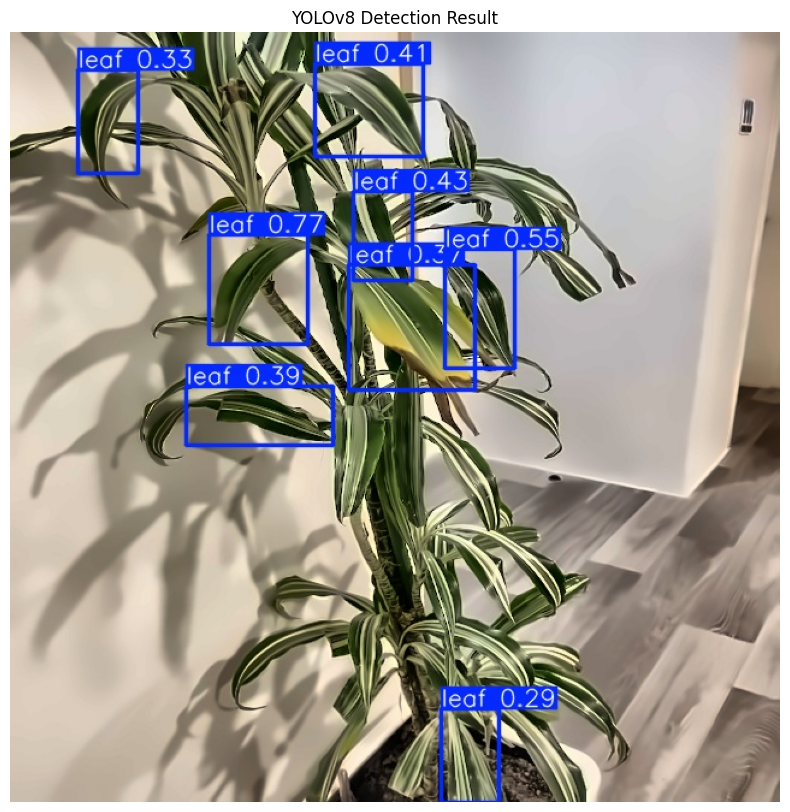

In [ ]:
model = YOLO("/content/best.pt")
test_image_path = "/content/processed_image.png"

# Run prediction
results = model.predict(source=test_image_path, conf=0.25, iou=0.5, save=True)

# Get output path
output_dir = results[0].save_dir
output_path = os.path.join(output_dir, os.path.basename(test_image_path))

# Read and display image
img = cv2.imread(output_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis("off")
plt.title("YOLOv8 Detection Result")
plt.show()

In [ ]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="SQfUS0dg6S8gIUIpBhnb")
project = rf.workspace("rdgf").project("leaf-detection-a4rgd")
version = project.version(5)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 11.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Leaf-Detection-5 in yolov8:: 100%|██████████| 19808/19808 [00:05<00:00, 3689.23it/s]


In [ ]:
path= '/content/Leaf-Detection-5'

In [ ]:
# Load dataset configuration
dataset_path = path + "/data.yaml"

# Check dataset information
print(open(dataset_path).read())

names:
- leaf
nc: 1
roboflow:
  license: CC BY 4.0
  project: leaf-detection-a4rgd
  url: https://universe.roboflow.com/rdgf/leaf-detection-a4rgd/dataset/5
  version: 5
  workspace: rdgf
test: ../test/images
train: ../train/images
val: ../valid/images



In [ ]:
from ultralytics import YOLO


model = YOLO("/content/runs/detect/train/weights/best.pt")


model.train(data="/content/Leaf-Detection-5/data.yaml", epochs=50, imgsz=640)

New https://pypi.org/project/ultralytics/8.3.121 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.120 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/train/weights/best.pt, data=/content/Leaf-Detection-5/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None,

train: Scanning /content/Leaf-Detection-5/train/labels.cache... 9110 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9110/9110 [00:00<?, ?it/s]

train: /content/Leaf-Detection-5/train/images/-_0168_jpg.rf.00bcb67276dadff82fd6b90f1583cacd.jpg: 1 duplicate labels removed
train: /content/Leaf-Detection-5/train/images/-_0168_jpg.rf.3d17ed17c1c437b0e5ca088b97b8a5f7.jpg: 1 duplicate labels removed
train: /content/Leaf-Detection-5/train/images/-_0168_jpg.rf.549c389b8b799bfc699edbf6fe99baf0.jpg: 1 duplicate labels removed
train: /content/Leaf-Detection-5/train/images/-_0168_jpg.rf.65de4ee12167f63f774ccf0b95988aeb.jpg: 1 duplicate labels removed
train: /content/Leaf-Detection-5/train/images/-_0168_jpg.rf.a3c5e37f08535caee59aec227fb4bdcd.jpg: 1 duplicate labels removed
train: /content/Leaf-Detection-5/train/images/-_0168_jpg.rf.bcf14eb1450b8950cb6530ccfc420e31.jpg: 1 duplicate labels removed
train: /content/Leaf-Detection-5/train/images/-_0316_jpg.rf.24aef4245e2c481fcd1902b9df1aec1d.jpg: 1 duplicate labels removed
train: /content/Leaf-Detection-5/train/images/-_0316_jpg.rf.8230547681bd2aef4da8654ed0a0e498.jpg: 1 duplicate labels removed


WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 183, len(boxes) = 51198. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 411.2±199.7 MB/s, size: 70.5 KB)


val: Scanning /content/Leaf-Detection-5/valid/labels.cache... 533 images, 0 backgrounds, 0 corrupt: 100%|██████████| 533/533 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 7, len(boxes) = 2627. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.85G      1.401      1.337      1.502         47        640: 100%|██████████| 570/570 [02:47<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.21it/s]

                   all        533       2627      0.698      0.566      0.684      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.85G      1.281      1.186      1.419         59        640: 100%|██████████| 570/570 [02:41<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.26it/s]

                   all        533       2627      0.662      0.594       0.67      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.85G      1.236      1.152      1.393         70        640: 100%|██████████| 570/570 [02:40<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.79it/s]


                   all        533       2627      0.619      0.627      0.666      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.85G       1.21       1.13      1.379         80        640: 100%|██████████| 570/570 [02:41<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.81it/s]

                   all        533       2627      0.659      0.565      0.658      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.86G      1.172      1.079      1.355         65        640: 100%|██████████| 570/570 [02:40<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.14it/s]


                   all        533       2627      0.704      0.615      0.716      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.86G      1.149      1.039      1.334         49        640: 100%|██████████| 570/570 [02:41<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.10it/s]

                   all        533       2627      0.688      0.633      0.728      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.86G      1.125      1.016      1.317         80        640: 100%|██████████| 570/570 [02:41<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.20it/s]


                   all        533       2627       0.71      0.652      0.741      0.533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.88G      1.098     0.9833        1.3         56        640: 100%|██████████| 570/570 [02:40<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.84it/s]

                   all        533       2627      0.669      0.662      0.733      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.88G      1.093     0.9746      1.298         48        640: 100%|██████████| 570/570 [02:42<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.84it/s]


                   all        533       2627      0.683      0.668      0.741      0.533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.89G      1.079     0.9596      1.291         43        640: 100%|██████████| 570/570 [02:43<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.73it/s]


                   all        533       2627      0.712      0.685      0.754      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.89G      1.074     0.9446      1.287         53        640: 100%|██████████| 570/570 [02:41<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.44it/s]


                   all        533       2627      0.728      0.691      0.776      0.553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.89G      1.053     0.9175      1.267         45        640: 100%|██████████| 570/570 [02:41<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.13it/s]

                   all        533       2627      0.731      0.691      0.779       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.89G      1.043      0.908      1.259         32        640: 100%|██████████| 570/570 [02:40<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.92it/s]

                   all        533       2627      0.715      0.689      0.771      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.89G      1.035     0.8967      1.255         33        640: 100%|██████████| 570/570 [02:42<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.92it/s]


                   all        533       2627      0.724      0.695      0.777      0.565

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.89G      1.021     0.8871      1.249         43        640: 100%|██████████| 570/570 [02:40<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.46it/s]

                   all        533       2627      0.718       0.71      0.786      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.89G      1.016      0.876       1.24         41        640: 100%|██████████| 570/570 [02:38<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.56it/s]

                   all        533       2627      0.753      0.678       0.79      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.89G      1.002     0.8613      1.237         41        640: 100%|██████████| 570/570 [02:38<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.98it/s]


                   all        533       2627      0.753      0.692      0.797      0.582

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.89G      1.001     0.8525      1.232         79        640: 100%|██████████| 570/570 [02:38<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.23it/s]

                   all        533       2627       0.74      0.683      0.789      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.89G     0.9873     0.8352      1.227        115        640: 100%|██████████| 570/570 [02:38<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.90it/s]


                   all        533       2627      0.764      0.687      0.796      0.581

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.89G     0.9852     0.8309      1.224         55        640: 100%|██████████| 570/570 [02:40<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.29it/s]

                   all        533       2627      0.728      0.692      0.782      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.89G     0.9764     0.8269      1.216         51        640: 100%|██████████| 570/570 [02:38<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.59it/s]

                   all        533       2627      0.739        0.7      0.792      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.89G     0.9779     0.8212      1.215         90        640: 100%|██████████| 570/570 [02:39<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.75it/s]


                   all        533       2627      0.733      0.728      0.809      0.595

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.89G     0.9694     0.8106       1.21         65        640: 100%|██████████| 570/570 [02:39<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.12it/s]

                   all        533       2627      0.743      0.709      0.802      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.89G     0.9615     0.8057      1.204         51        640: 100%|██████████| 570/570 [02:39<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.77it/s]


                   all        533       2627      0.742      0.731      0.817      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.89G     0.9562     0.7976        1.2         61        640: 100%|██████████| 570/570 [02:40<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.87it/s]

                   all        533       2627      0.753       0.73      0.813      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.89G      0.953     0.7887      1.198         32        640: 100%|██████████| 570/570 [02:38<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.12it/s]

                   all        533       2627      0.759      0.722      0.814      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.89G     0.9377     0.7834      1.191         75        640: 100%|██████████| 570/570 [02:39<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.84it/s]

                   all        533       2627      0.759      0.723      0.811      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.89G     0.9387     0.7816      1.194         44        640: 100%|██████████| 570/570 [02:40<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.96it/s]


                   all        533       2627       0.77       0.72      0.822      0.613

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.89G     0.9303     0.7693      1.186         60        640: 100%|██████████| 570/570 [02:38<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.29it/s]


                   all        533       2627      0.762      0.723      0.814      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.89G     0.9225     0.7574      1.182         34        640: 100%|██████████| 570/570 [02:40<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.24it/s]

                   all        533       2627      0.771      0.716      0.817      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.89G     0.9207     0.7591      1.176        125        640: 100%|██████████| 570/570 [02:39<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.92it/s]

                   all        533       2627      0.748      0.744      0.818      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.89G     0.9149     0.7529      1.176         29        640: 100%|██████████| 570/570 [02:38<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.18it/s]


                   all        533       2627       0.74       0.75      0.819      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.89G      0.912     0.7455      1.172         58        640: 100%|██████████| 570/570 [02:37<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.88it/s]


                   all        533       2627      0.746      0.742      0.817      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.89G     0.9055     0.7361      1.165         88        640: 100%|██████████| 570/570 [02:39<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.68it/s]


                   all        533       2627      0.753      0.743      0.821      0.615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.89G     0.9026      0.731      1.165         52        640: 100%|██████████| 570/570 [02:37<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.41it/s]

                   all        533       2627      0.763      0.743      0.824      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.89G     0.8983     0.7277       1.16         23        640: 100%|██████████| 570/570 [02:39<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.81it/s]


                   all        533       2627       0.74      0.759      0.822      0.615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.89G     0.8908     0.7268       1.16         28        640: 100%|██████████| 570/570 [02:38<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.20it/s]


                   all        533       2627      0.751      0.746      0.825      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.89G     0.8886      0.718      1.159         71        640: 100%|██████████| 570/570 [02:40<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.14it/s]


                   all        533       2627      0.747      0.767      0.831      0.624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.89G     0.8867     0.7131      1.157         51        640: 100%|██████████| 570/570 [02:39<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.99it/s]


                   all        533       2627      0.778      0.738       0.83      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.89G     0.8826     0.7061       1.15         44        640: 100%|██████████| 570/570 [02:40<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.82it/s]

                   all        533       2627      0.742       0.77       0.83      0.623


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.89G     0.8507     0.6293      1.128         22        640: 100%|██████████| 570/570 [02:33<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.84it/s]


                   all        533       2627      0.769      0.743      0.832      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.89G      0.833     0.6149      1.117         38        640: 100%|██████████| 570/570 [02:33<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.91it/s]


                   all        533       2627      0.761      0.754      0.836      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.89G     0.8284     0.6088      1.115         26        640: 100%|██████████| 570/570 [02:32<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.82it/s]


                   all        533       2627      0.771      0.751      0.838      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.89G     0.8201        0.6      1.107         32        640: 100%|██████████| 570/570 [02:32<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.61it/s]

                   all        533       2627      0.773       0.75      0.836      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.89G      0.812     0.5892      1.101         19        640: 100%|██████████| 570/570 [02:31<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.49it/s]

                   all        533       2627      0.767      0.756      0.836       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.89G     0.8065     0.5882      1.102         34        640: 100%|██████████| 570/570 [02:30<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.22it/s]

                   all        533       2627      0.744      0.781      0.839      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.89G     0.8062     0.5831        1.1         28        640: 100%|██████████| 570/570 [02:31<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.21it/s]

                   all        533       2627      0.771      0.766      0.842      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.89G     0.7993     0.5741      1.093         27        640: 100%|██████████| 570/570 [02:31<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.23it/s]


                   all        533       2627      0.775       0.76      0.839      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.89G      0.792     0.5707      1.091         40        640: 100%|██████████| 570/570 [02:31<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.53it/s]


                   all        533       2627      0.768      0.773      0.841      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.89G      0.788     0.5647       1.09         33        640: 100%|██████████| 570/570 [02:31<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.71it/s]


                   all        533       2627      0.761      0.777      0.841      0.635

50 epochs completed in 2.274 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 6.2MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.120 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:09<00:00,  1.82it/s]


                   all        533       2627      0.775      0.765      0.842      0.636
Speed: 0.3ms preprocess, 3.0ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/train5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c333c369c90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 


image 1/1 /content/Screenshot 1446-11-02 at 12.48.26 AM.png: 640x544 5 leafs, 7.8ms
Speed: 2.8ms preprocess, 7.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 544)
Results saved to runs/detect/predict8


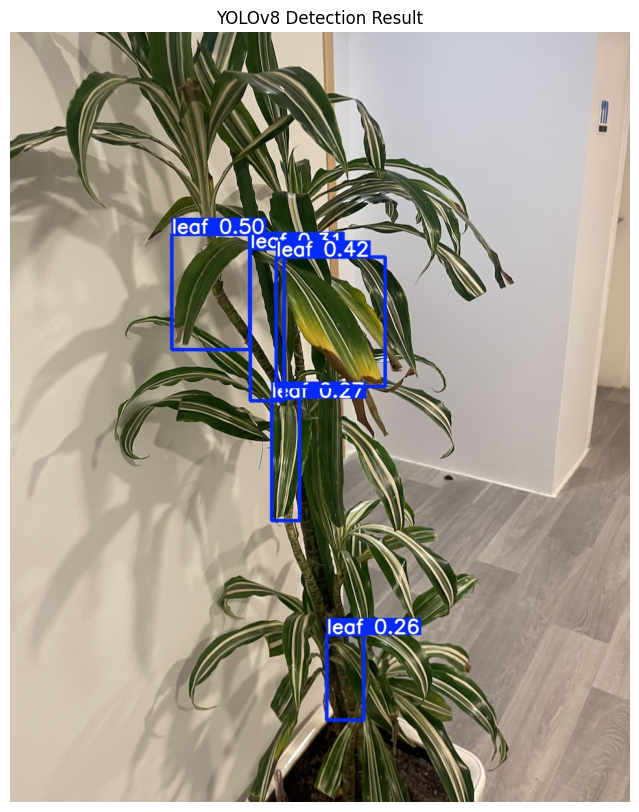

In [ ]:


model = YOLO("/content/runs/detect/train5/weights/best.pt")


test_image_path = "/content/Screenshot 1446-11-02 at 12.48.26 AM.png"

results = model.predict(source=test_image_path, save=True, conf=0.25)

output_dir = results[0].save_dir


output_images = glob.glob(os.path.join(output_dir, "*.png")) + glob.glob(os.path.join(output_dir, "*.jpg"))

output_path = output_images[0] if output_images else None

if output_path and os.path.exists(output_path):
    img = cv2.imread(output_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis("off")
    plt.title("YOLOv8 Detection Result")
    plt.show()
